In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import xlrd


In [17]:
#READING DATA FROM TEXT

DATA_FILE = 'C:\\Users\\bhumi\\Downloads\\fire_theft.xls'
book = xlrd.open_workbook(DATA_FILE,encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = data.shape[0] -1
print(n_samples)

41


In [18]:
# CREATING PLACEHOLDERS

X = tf.placeholder(tf.float32,name = "X")

Y = tf.placeholder(tf.float32,name = "Y")

In [19]:
#CREATING WEIGHTS AND BIASIS

W = tf.Variable(0.00,name = 'Weights')

b= tf.Variable(0.00,name = 'Bias')


In [22]:
#Linear Model
Y_pred= X*W + b

#Loss function
loss = tf.square(Y-Y_pred,name = 'loss')

#Gradient descent optimizer

optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)




In [23]:
# INITIALIZING TENSORFLOW SESSION

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        for x,y in data:
            sess.run(optimizer,feed_dict={X:x,Y:y})
    w_value,b_value = sess.run([W,b])

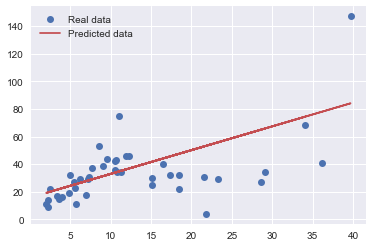

In [34]:
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()